In [9]:
import os
import pickle
import matplotlib.pyplot as plt

In [10]:
def load_file(path):
    with open(path, 'rb') as file:
        history = pickle.load(file)
    return history

In [11]:
history = load_file('./saved/fcn_history.pkl')

In [12]:
def plot_metric_across_models(histories, labels, key="loss", save_path=None):
    assert len(histories) == len(labels), "Number of histories and labels must match"
    plt.figure(figsize=(6, 4))

    for i, his in enumerate(histories):
        values = [epoch[key] for epoch in his]
        plt.plot(range(1, len(values) + 1), values, marker='.', label=labels[i])

    plt.title(f"{key.capitalize()} over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300)

    plt.show()

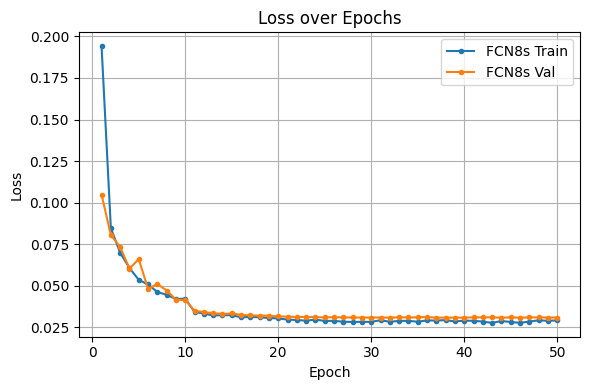

In [13]:
plot_metric_across_models(
    [history['train'], history['val']],
    ["FCN8s Train", "FCN8s Val"],
    key="loss",
    save_path="./outputs/fcn_loss.png",
)

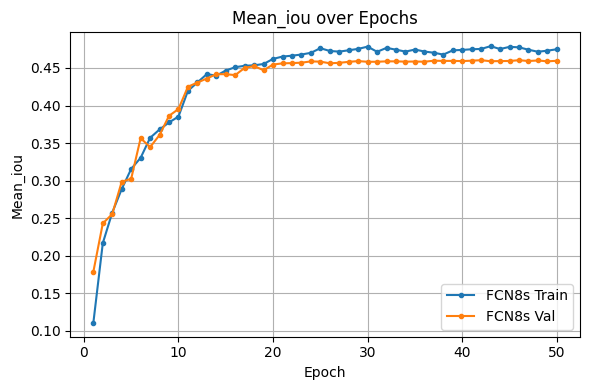

In [14]:
plot_metric_across_models(
    [history['train'], history['val']],
    ["FCN8s Train", "FCN8s Val"],
    key="mean_iou",
    save_path="./outputs/fcn_miou.png",
)

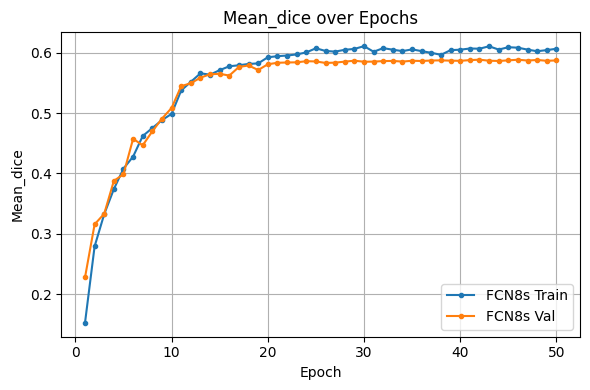

In [15]:
plot_metric_across_models(
    [history['train'], history['val']],
    ["FCN8s Train", "FCN8s Val"],
    key="mean_dice",
    save_path="./outputs/fcn_mdice.png",
)

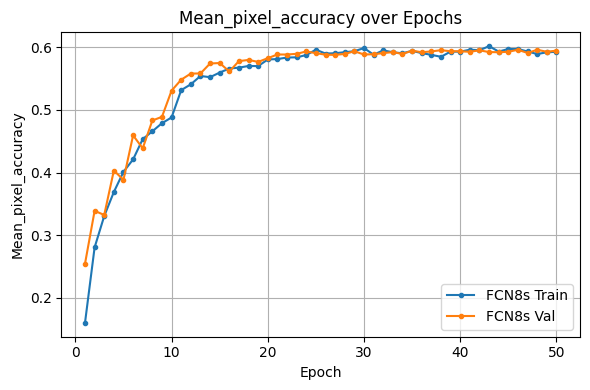

In [16]:
plot_metric_across_models(
    [history['train'], history['val']],
    ["FCN8s Train", "FCN8s Val"],
    key="mean_pixel_accuracy",
    save_path="./outputs/fcn_mpacc.png",
)